# King Country Hose Price Prediction 

Bu Projede King Country WA da ev fiyatlarını regression ile tahmin eden modeli geliştireceğiz.Data Kaggle dan alınşıtır.In this dataset we have to predict the sales price of houses in King County, Seattle. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

Data Dictionary

id :- It is the unique numeric number assigned to each house being sold.
date :- It is the date on which the house was sold out.
price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
bedrooms :- It determines number of bedrooms in a house.
bathrooms :- It determines number of bathrooms in a bedroom of a house.
sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
sqft_lot : It is also the measurement variable which determines square foot of the lot.
floors: It determines total floors means levels of house.
waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
condition : It determines the overall condition of a house on a scale of 1 to 5.
grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
sqft_above : It determines square footage of house apart from basement.
sqft_basement : It determines square footage of the basement of the house.
yr_built : It detrmines the date of building of the house.
yr_renovated : It detrmines year of renovation of house.
zipcode : It determines the zipcode of the location of the house.
lat : It determines the latitude of the location of the house.
long : It determines the longitude of the location of the house.
sqft_living15 : Living room area in 2015(implies-- some renovations)
sqft_lot15 : lotSize area in 2015(implies-- some renovations)

## Gerekli Paketler import Ediliyor

<img src = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwalkingdead.fandom.com%2Fwiki%2FKing_County_Caf%25C3%25A9&psig=AOvVaw16dWmDsxHGH3wpGIyO-x1e&ust=1722828763726000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCKiS17az2ocDFQAAAAAdAAAAABAE'>

In [56]:
import pandas as pd # data dosyalarını okuma paketi
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

In [57]:
import warnings 
warnings.filterwarnings('ignore')

### Import Data

In [58]:
df=pd.read_csv('kc_house_data.csv')

In [59]:
ls 

 cars.xls                         kc_house_data.csv
 combine.csv                     'King Country Home Price Prediction.ipynb'
'Day 3 Regression.ipynb'         'Multiple Linear Regression.ipynb'
 heightweight.csv                 PastHires.csv
'House Price Predicition.ipynb'   sales.csv


In [60]:
pwd

'/home/sifa/projects/ai/Day03'

### EDA - Explorarty Data Alaysis - Keşifsel Veri Analizi

In [61]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [63]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [64]:
df['bedrooms'].mean()+3*df['bedrooms'].std()   #outlier hesaplamak  için std (standart sapma 3 ile çarpılır ve mean değerine eklenir eğer max dan küçük ise outlier vardır demektir. burada onu hesapladı...

6.1610271165396

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [66]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [67]:
df.shape

(21613, 21)

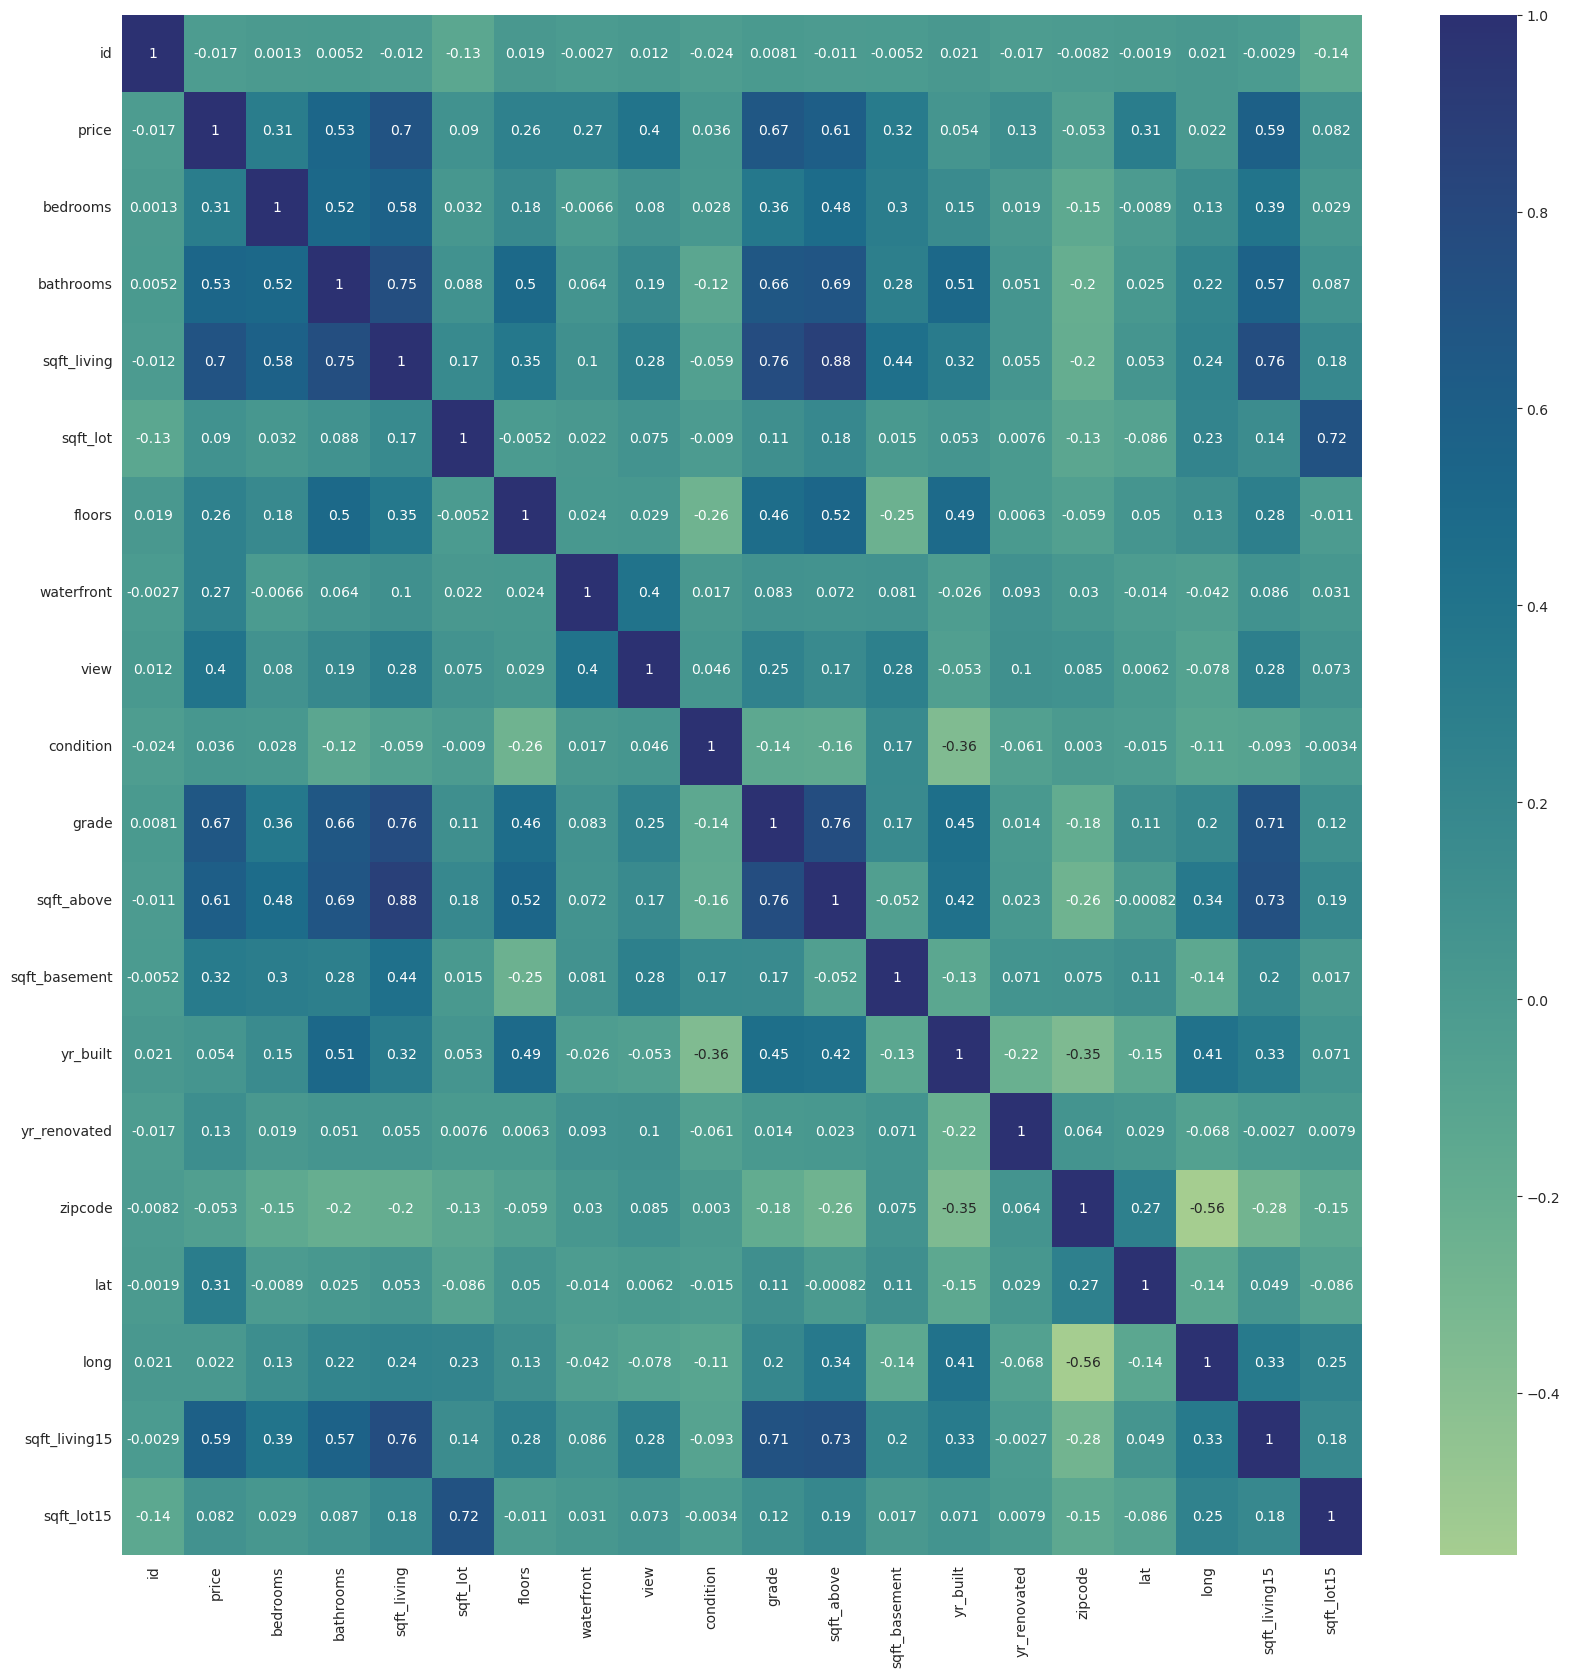

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest');

In [69]:
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

<Axes: xlabel='bedrooms'>

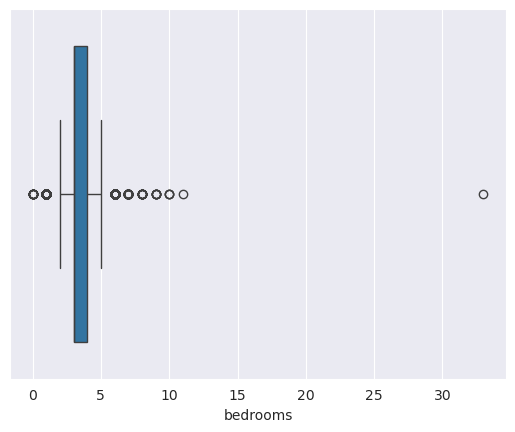

In [70]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='sqft_living'>

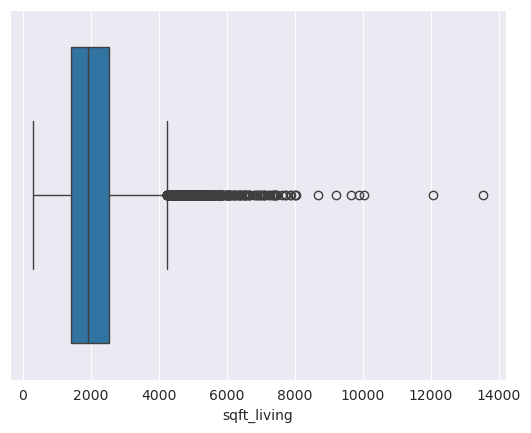

In [71]:
sns.boxplot(x=df['sqft_living']) #Burada outlier var çıkarmamız gerekiyor

<Axes: xlabel='bedrooms', ylabel='Count'>

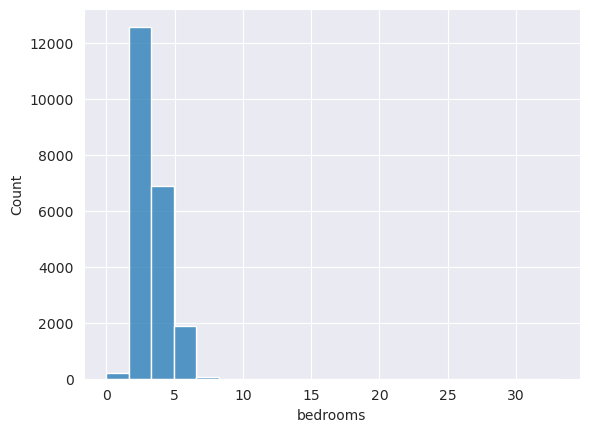

In [72]:
sns.histplot(x=(df['bedrooms']),bins=20)

In [73]:
outliers=df.quantile(q=.97,numeric_only=True)

In [74]:
df.shape

(21613, 21)

### Outlier Silinmesi (Uç Değerler)

In [75]:
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['bathrooms']<outliers['bathrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]


<Axes: xlabel='price', ylabel='Count'>

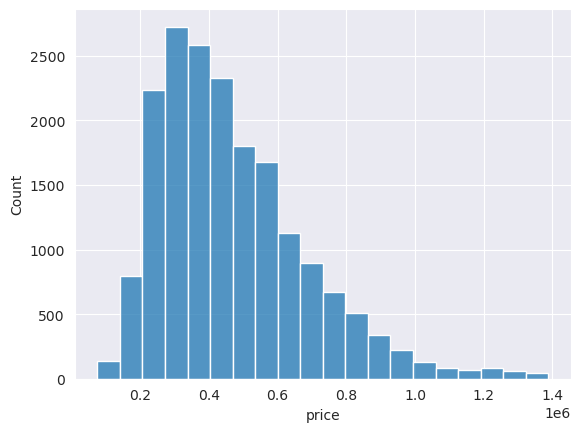

In [76]:
sns.histplot(x=(df['price']),bins=20)

# Feature Engineering

In [77]:
df['zipcode']=df['zipcode'].astype('category')

In [78]:
df['bedrooms']=df['bedrooms']**2  #önemini artırmak


In [79]:
df['bathrooms']=df['bathrooms']**2

In [80]:
df['sqft_living']=df['sqft_living']**2

In [81]:
import datetime

In [82]:
df['age']= datetime.datetime.now().year-df['yr_built']

In [83]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [84]:
df['yr_renovated']=np.where(df['yr_renovated']>0,1,0)
df['sqft_basement']=np.where(df['sqft_basement']>0,1,0)

In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,...,2170,1,1951,1,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [86]:
x=df.drop(['id','date','lat','price','long'],axis=1)
y=df['price']

In [87]:
x=pd.get_dummies(x,drop_first=True)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

### Modelling

In [89]:
lr=LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression()

In [91]:
tahmin=lr.predict(x_test)

In [92]:
r2_score(y_test,tahmin)

0.8314604639071292

In [93]:
mean_squared_error(y_test,tahmin)**.5

87443.19374803737

In [94]:
# Sonuc Hedef R2>.80 ve RMSE<$100K Mission Accomplished

In [95]:
R=Ridge()

In [96]:
R.fit(x_train,y_train)

Ridge()

In [97]:
tahmin2=R.predict(x_test)

In [98]:
mean_squared_error(y_test,tahmin2)**.5

87654.71387513963

In [99]:
r2_score(y_test,tahmin2)

0.8306441025728579

# Feature Importance 

In [109]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})

In [110]:
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)

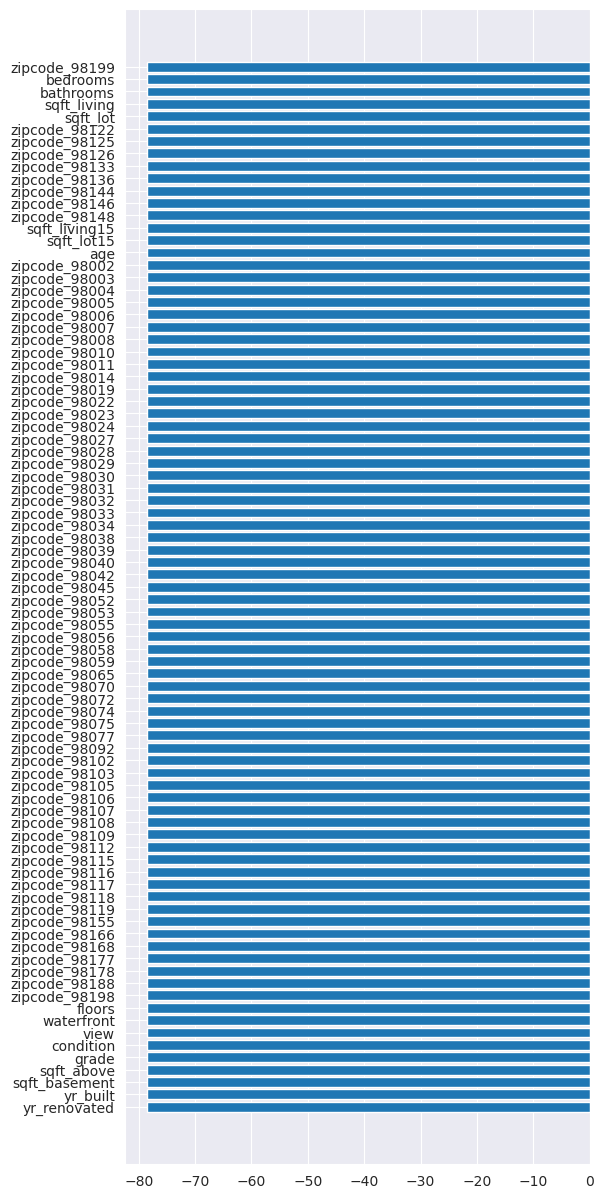

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis() 

In [103]:
residuals=y_test-tahmin

<Axes: xlabel='price', ylabel='Count'>

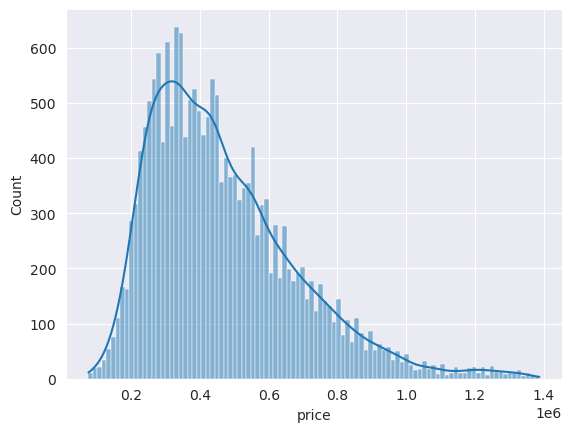

In [104]:
sns.histplot(x=(df['price']),kde=True,bins=100)

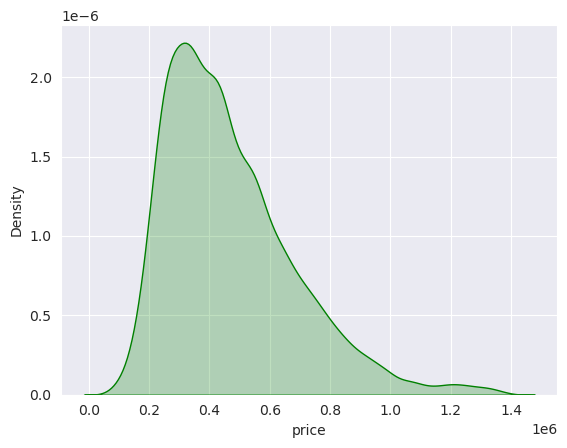

In [105]:
sns.kdeplot(x=df['price'],fill=True,color='green');

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [116]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,8.424394e-01,8.454714e+04,5.947045e+04
Linear,8.314605e-01,8.744319e+04,6.291177e+04
Lasso,8.314468e-01,8.744674e+04,6.290702e+04
Ridge,8.306441e-01,8.765471e+04,6.308635e+04
Gradient Boosting,7.516072e-01,1.061560e+05,8.037245e+04
Extra Tree,6.320245e-01,1.292066e+05,8.581612e+04
Decision Tree,5.895250e-01,1.364641e+05,9.262754e+04
ElasticNet,5.633142e-01,1.407536e+05,1.086926e+05
mlp_regressor,4.314215e-01,1.606092e+05,1.242916e+05
KNeighborsRegressor,3.542860e-01,1.711572e+05,1.413413e+05
